**MULTIVARIATE ANALYSIS**

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train.csv", sep=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.sample(5)

age            job  marital education default  balance housing loan  \
29431   31    blue-collar  married  tertiary      no      433      no  yes   
43355   26     management   single  tertiary      no     1370      no   no   
22891   51  self-employed  married   primary      no     1242      no   no   
10595   53     technician  married  tertiary      no     6072      no  yes   
23101   34     management  married  tertiary      no      297     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
29431  cellular    3   feb       114         1     -1         0  unknown  no  
43355  cellular   25   mar       231         1    295         1    other  no  
22891  cellular   25   aug        75        11     -1         0  unknown  no  
10595   unknown   16   jun       226         4     -1         0  unknown  no  
23101  cellular   26   aug        63         4     -1         0  unknown  no

In [8]:
numericals = ['age','balance','day','duration','campaign','pdays','previous']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

<ipython-input-9-070870735d82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot =True,fmt = '.2f')


<Axes: >

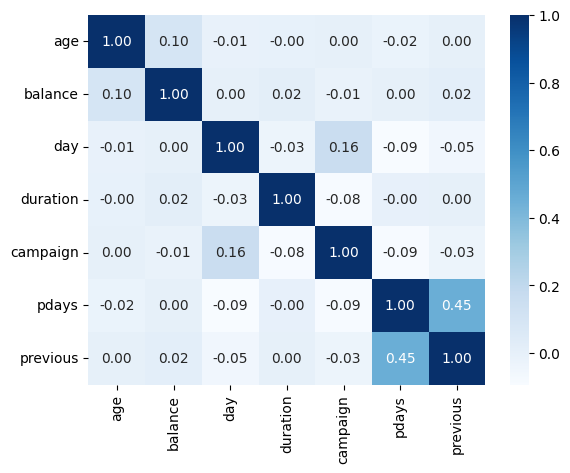

In [9]:
sns.heatmap(df.corr(),cmap='Blues',annot =True,fmt = '.2f')


berdasarkan hasil visualisasi heatmap tidak ditemukan korelasi yang kuat antar variable numerik

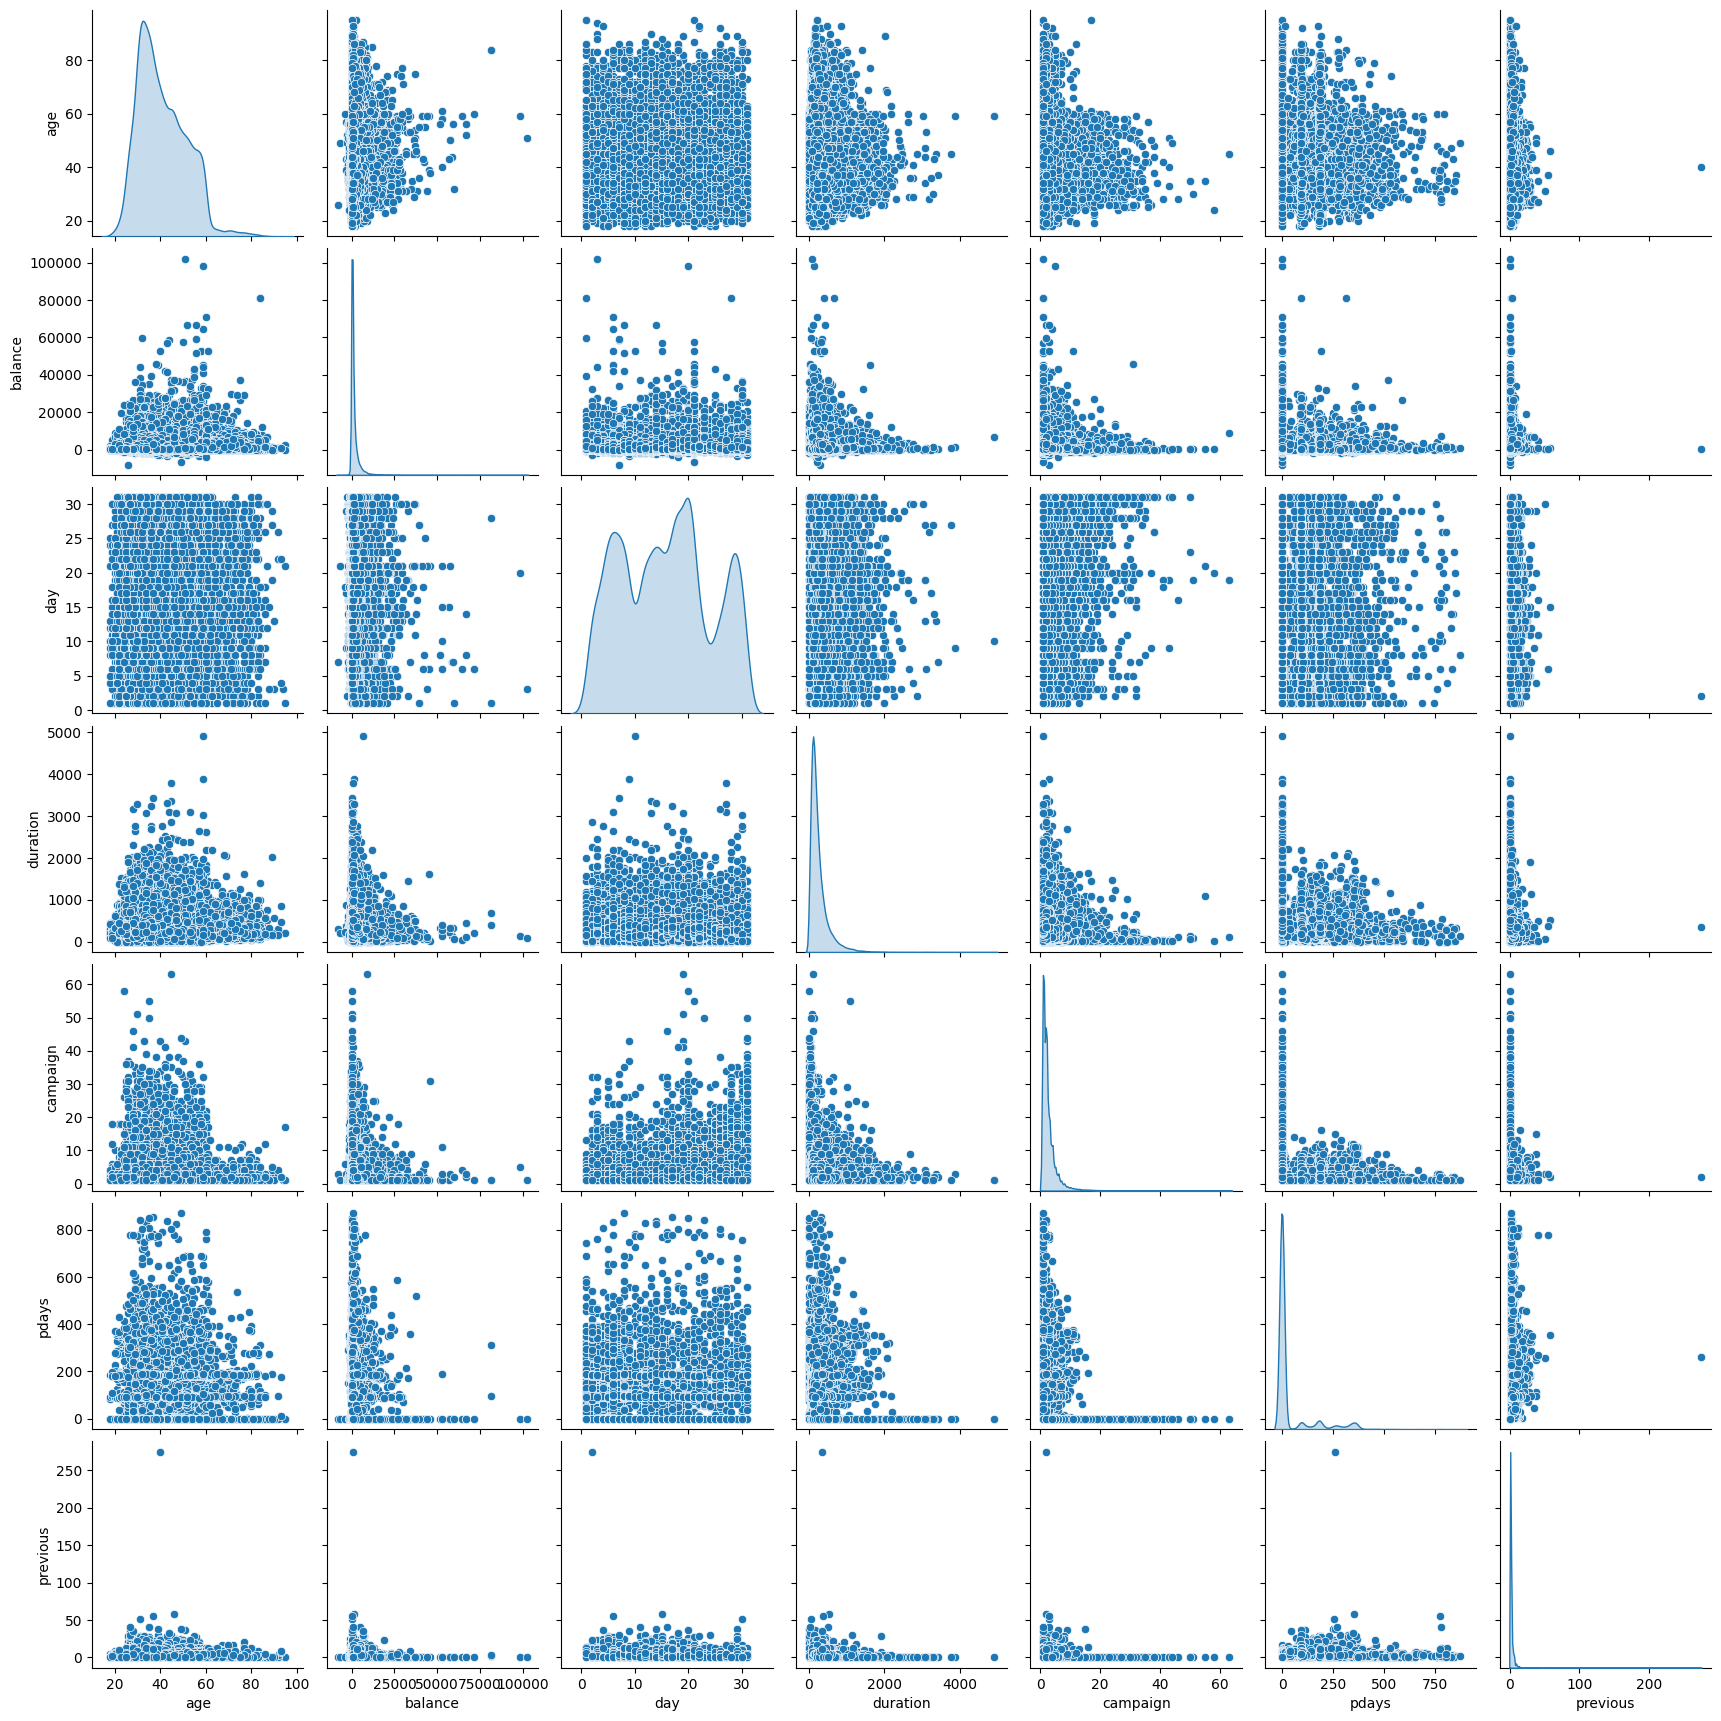

In [ ]:
sns.pairplot(df,diag_kind='kde')

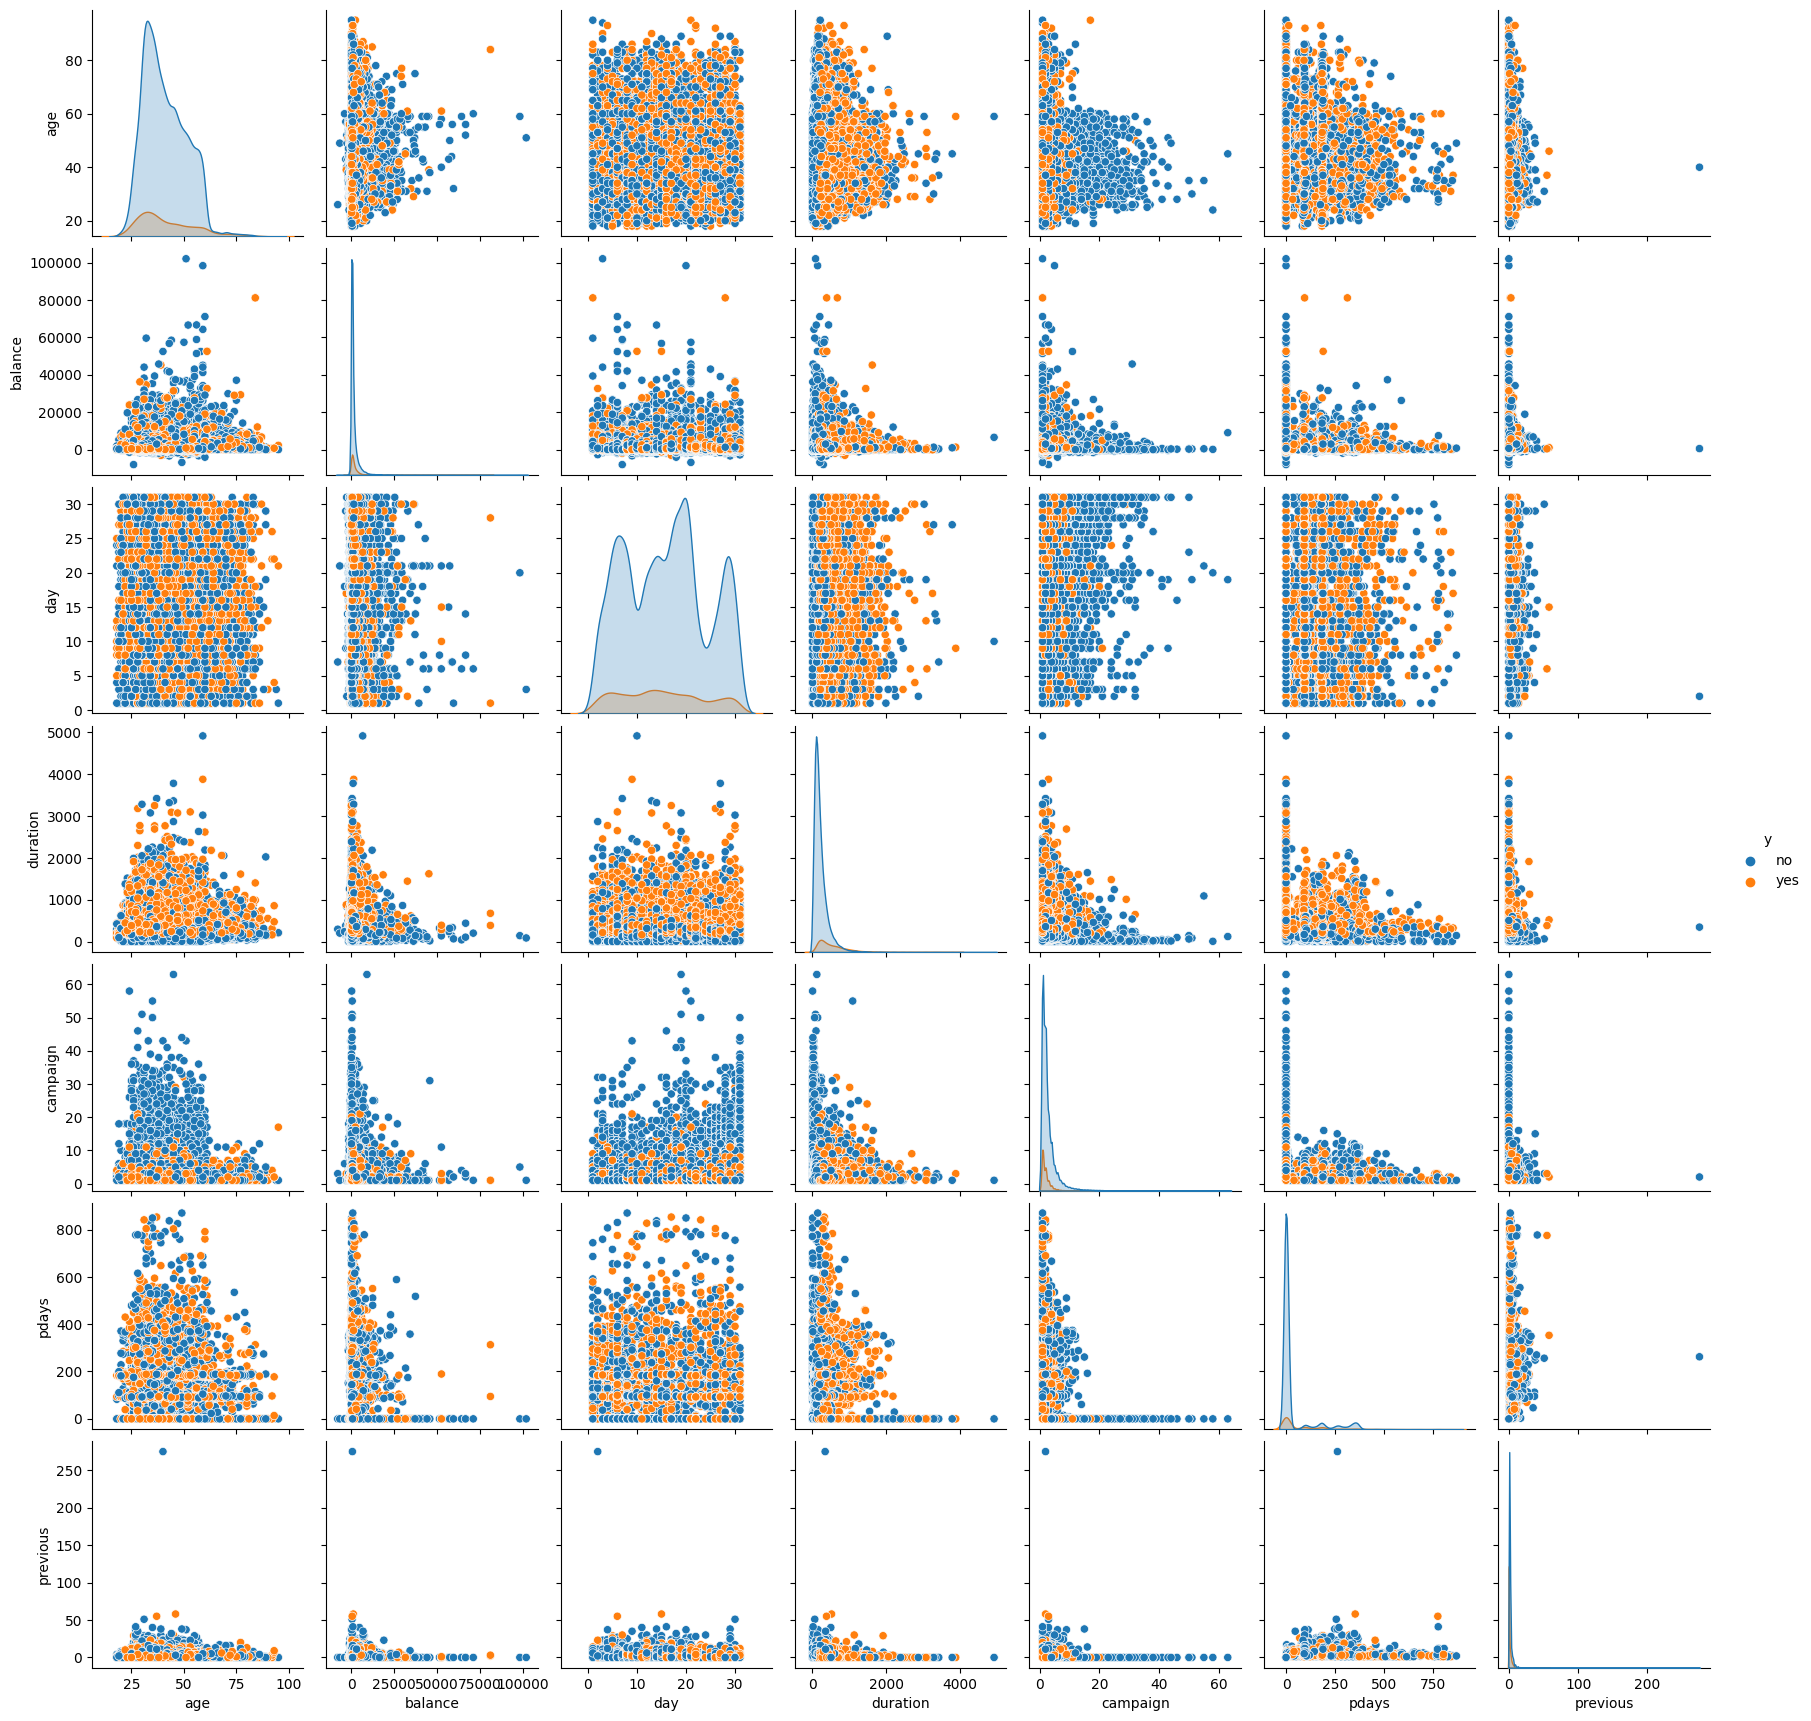

In [ ]:
sns.pairplot(df,diag_kind='kde', hue = 'y')

berdasarkan visualisasi diatas, tidak ditemukan insight pada variabel numerikal dg hue kolom y. karena warna tidak terpisah dengan baik.

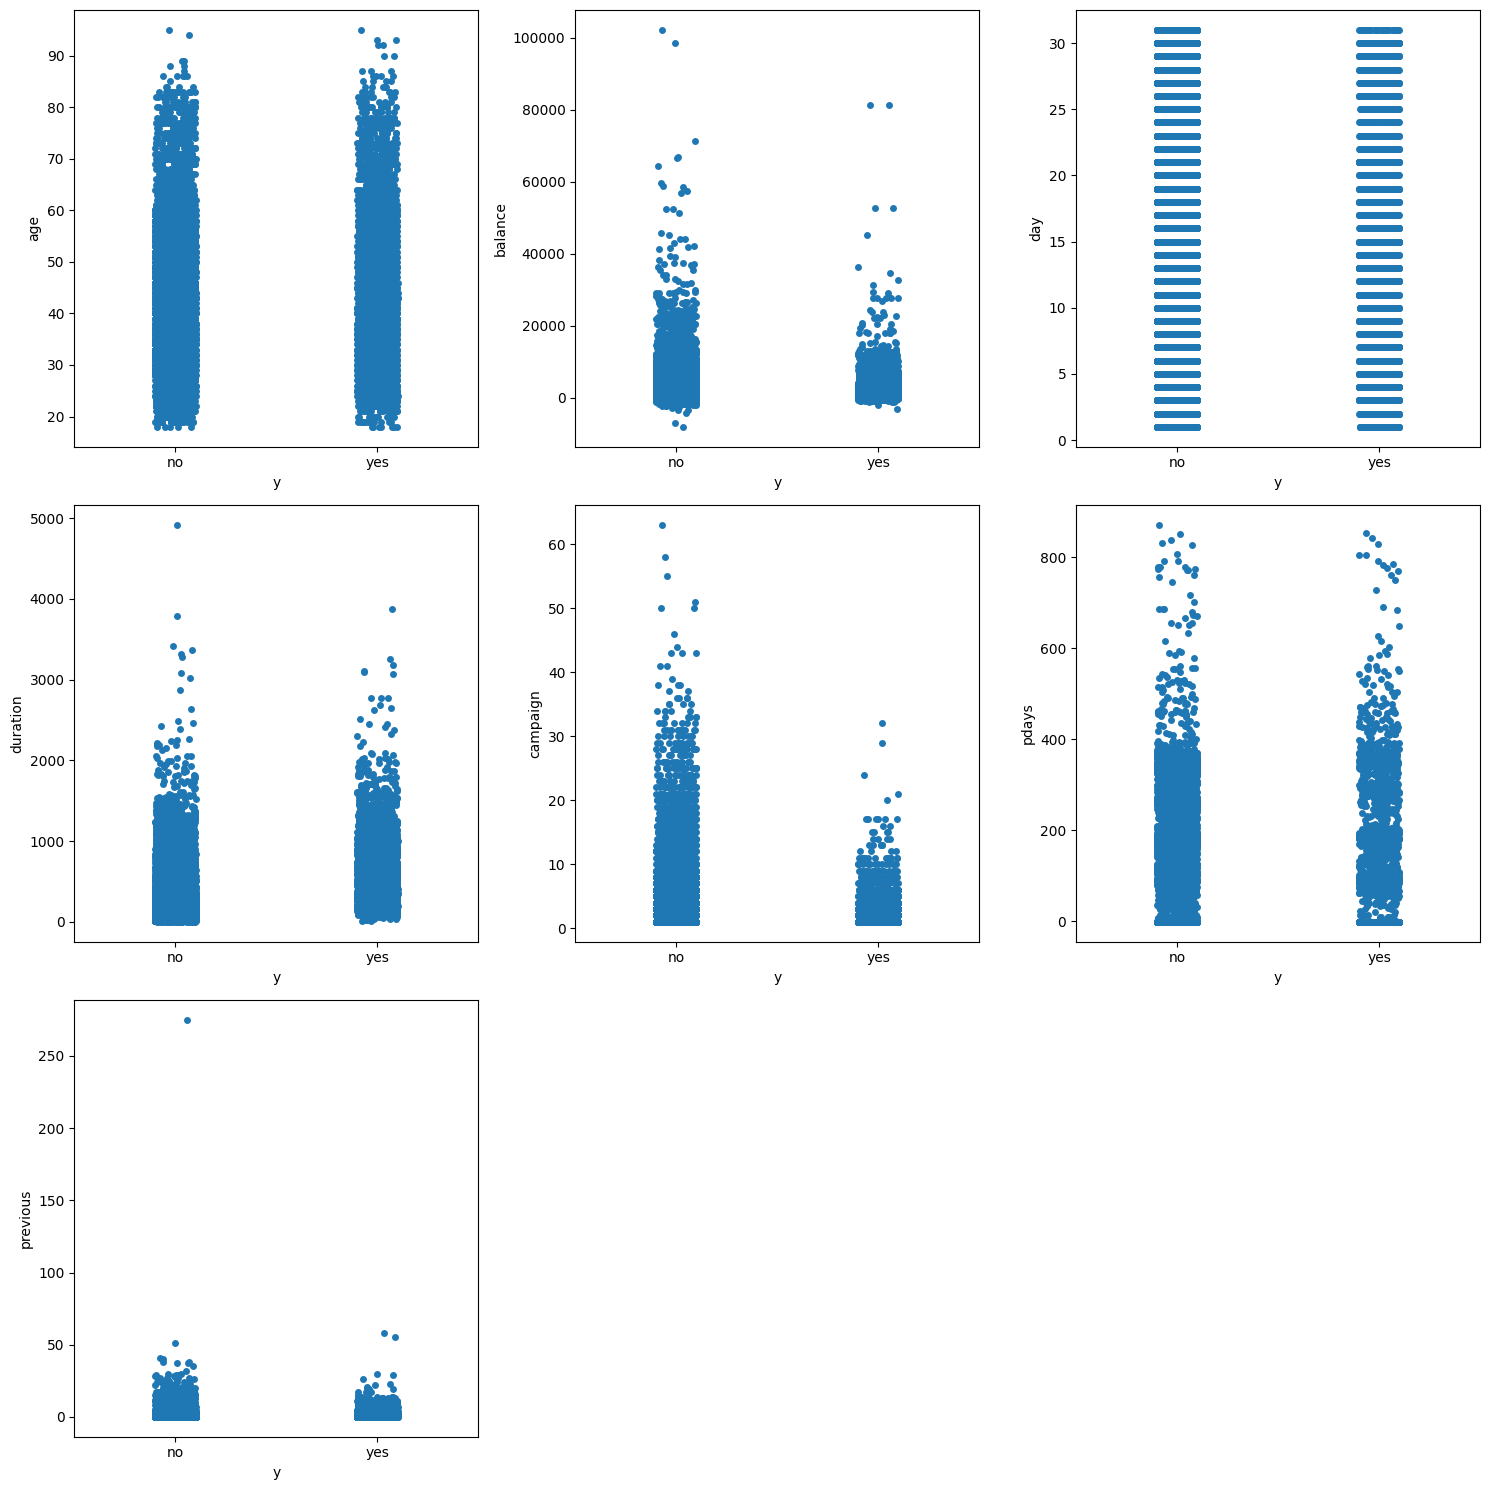

In [23]:
fig = plt.figure(figsize=(15, 15))

for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='y', y=numericals[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

- balance dan y = terdapat outlier, ada yang yearly balancenya besar tapi tetap tidak memutuskan untuk melakukan deposito. hal ini berarti besarnya balance tidak pasti mempengaruhi sesorang akan melakukan deposito atau tidak
- campaign dan y : lebih banyak orang yang memutuskan untuk tidak melakukan deposito,  walaupun jumlah kontak yang sidah dihubungi banyak




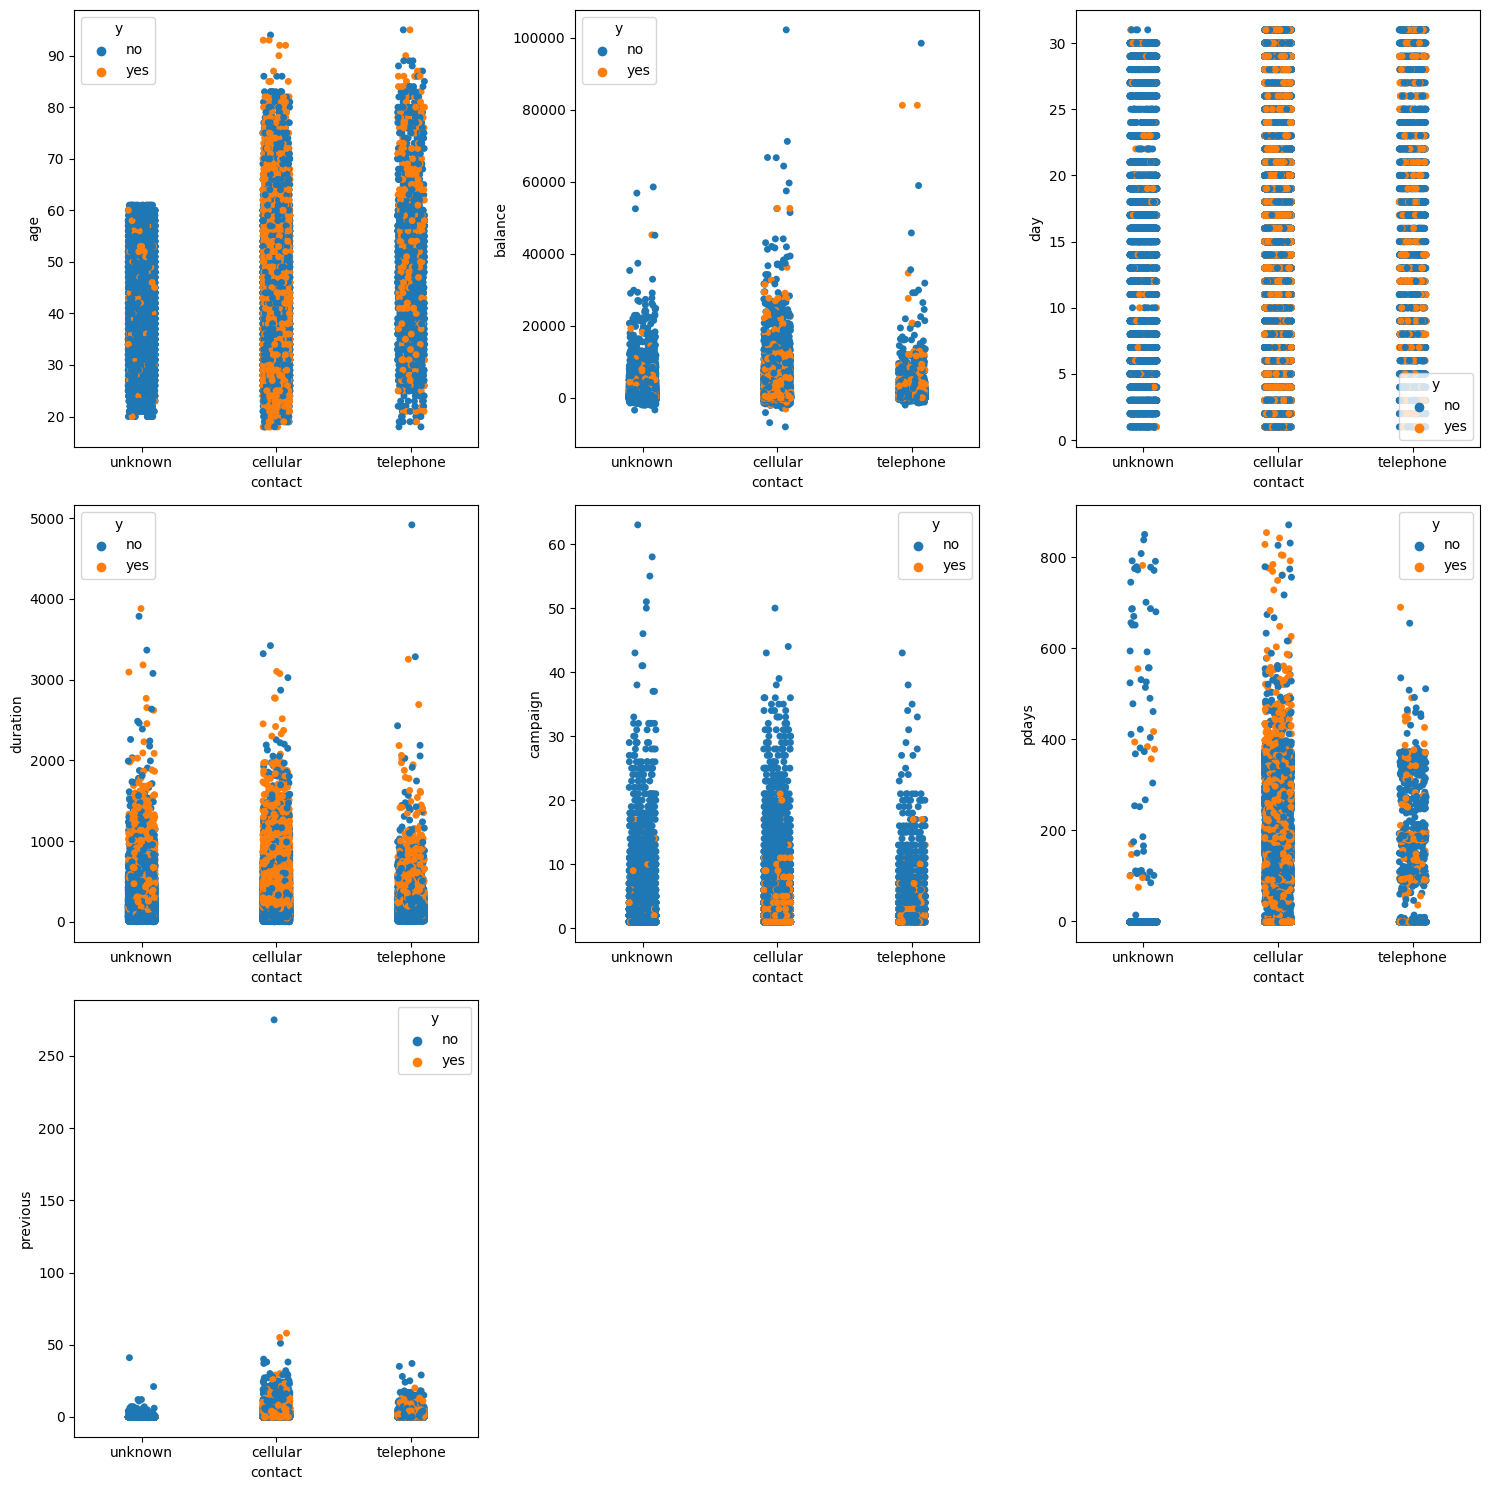

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()


- dari grafik diatas, terlihat bahwa customer banyak yang di hubungi melalui cellular contact
- jika dilihat berdasarkan age, duration, day, dan pdays, lebih banyak customer yang melakukan deposito daripada yang tidak
- untuk persebaran campaign berdasarkan contact terlihat tidak ada perbedaan yang terlalu signifikan

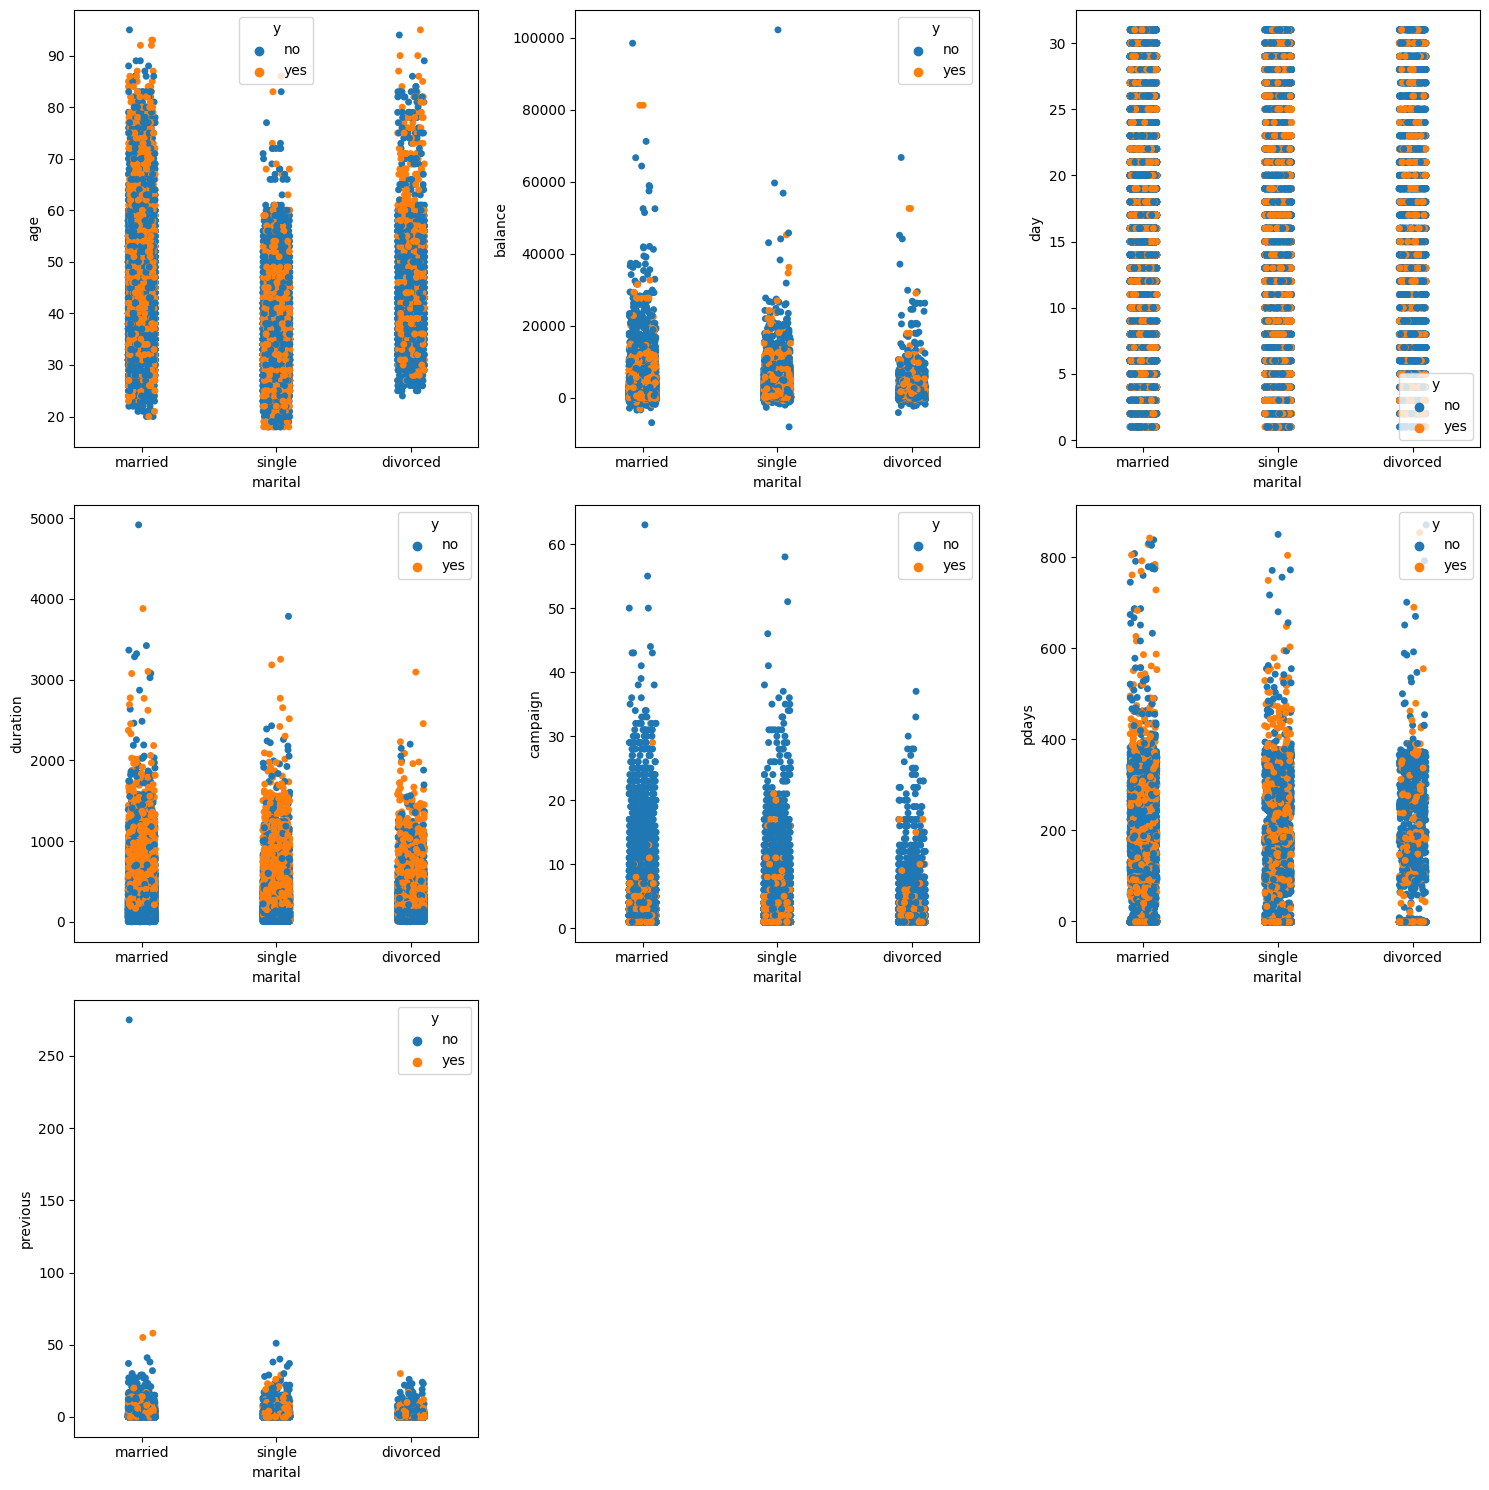

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='marital', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

- age dan marital : rata rata berumur antara 25-70 untuk orang yang sudah menikah, umur rata rata 20-60 untuk orang yang single, dan umur rata rata 30-55 untuk yang divorce
- balance dan marital : orang yang sudah menikah dan masih single cenderung memiliki balance yang lebih besar dibandingkan dengan yang sudah bercerai
- duration dan marital : durasi telepon untuk orabg yang sudah menikah jauh lebih lama dibandingan yang single dan divorce
- campaign dan marital : lebih sering mengubungi orang yang sudah menikah

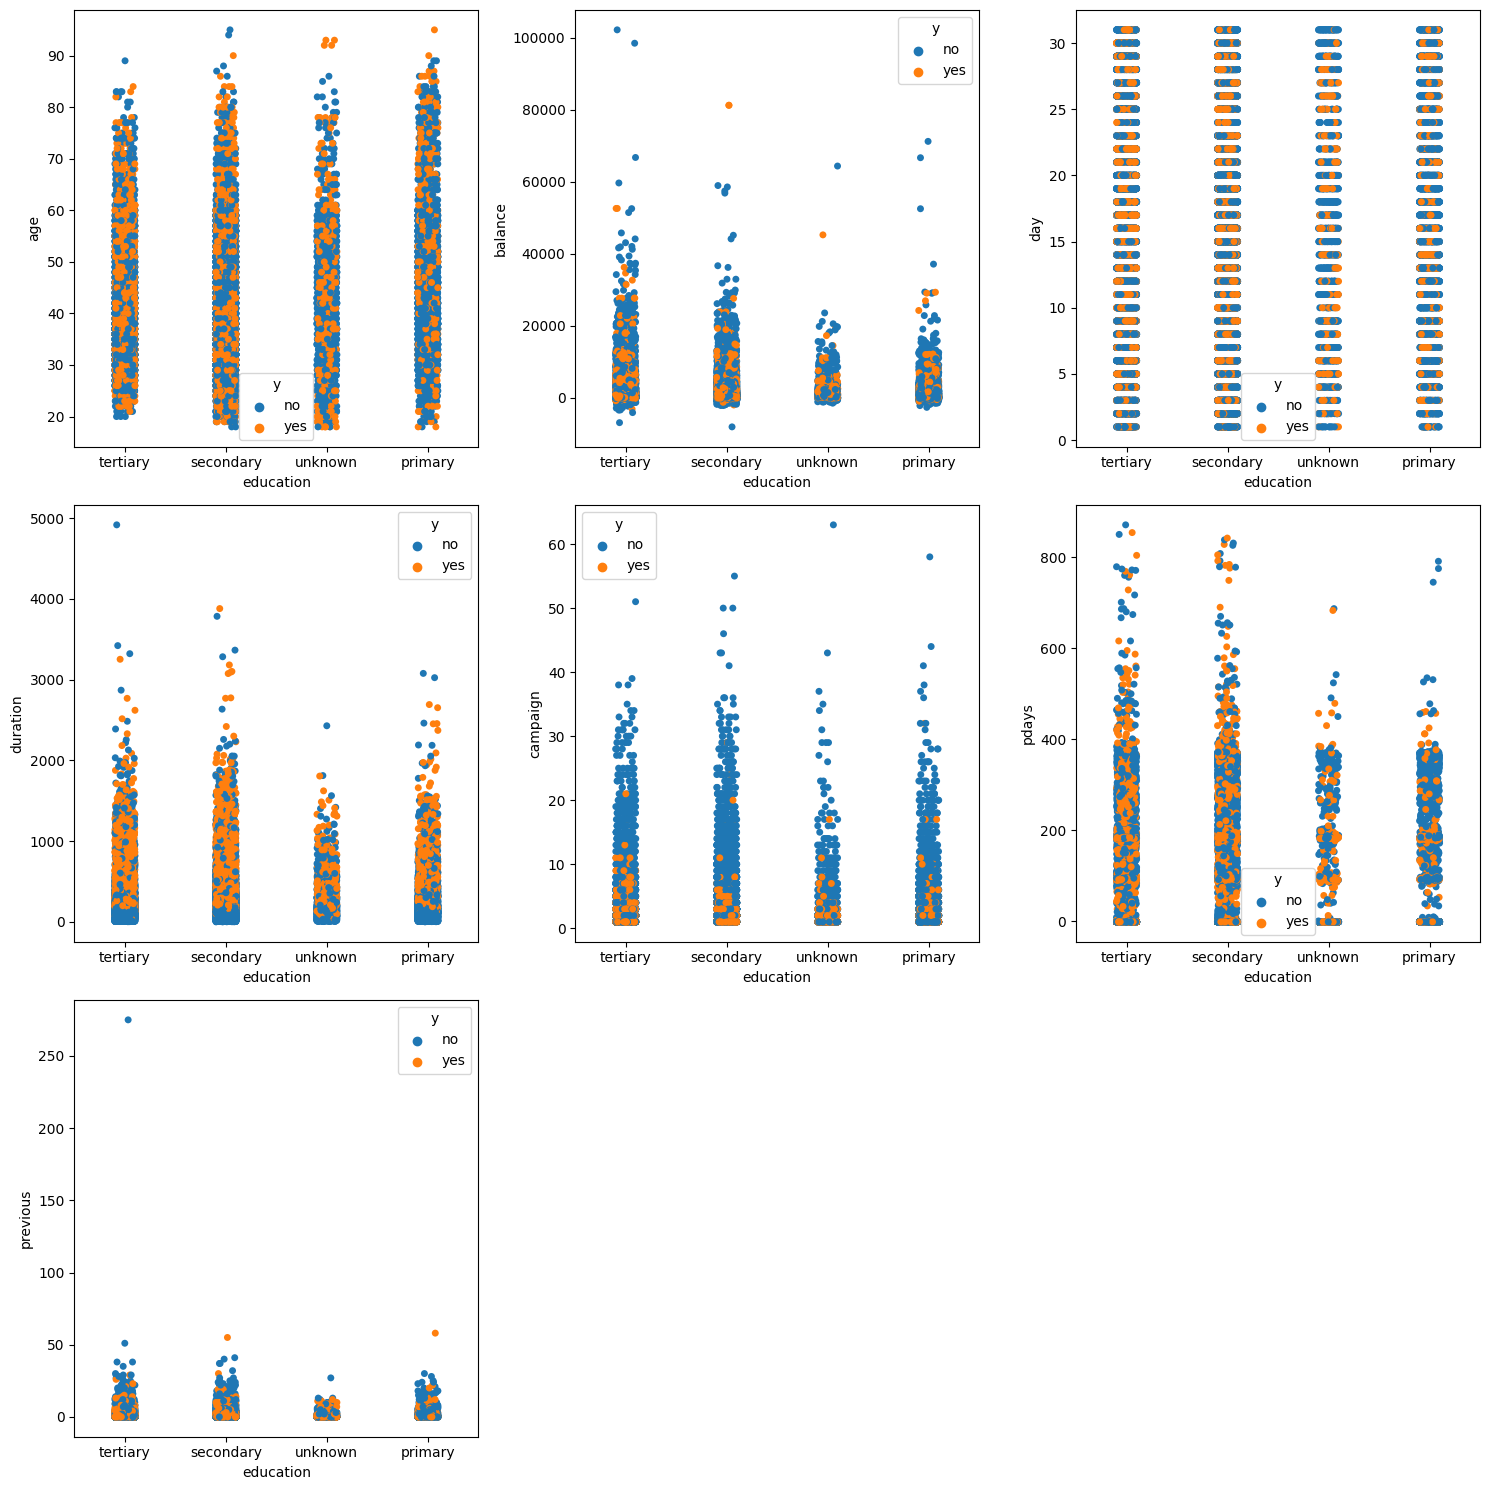

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='education', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

- age dan education : umur terbanyak pada pendidikan primary, ada yang sampai berumur lebih dari 90 tahun
- balance dan education : orang yang pendidikannya sudah pada tingkatan tertiary mempunyai saldo yang lebih banyak, semakin tinggi tingkatan, semakin besar juga saldonya
- duration dan education : durasi telepon cenderung lebih lama pada tingkatan pendidikan tertiary dan secondary
- campaign dan education : lebih banyak melakukan campaign pada tingkatan pendidikan secondary
- pdays dan campaign : tingkatan pendidikan tertiary banyak yang belum dihubungi kembali setelah melakukan campaign

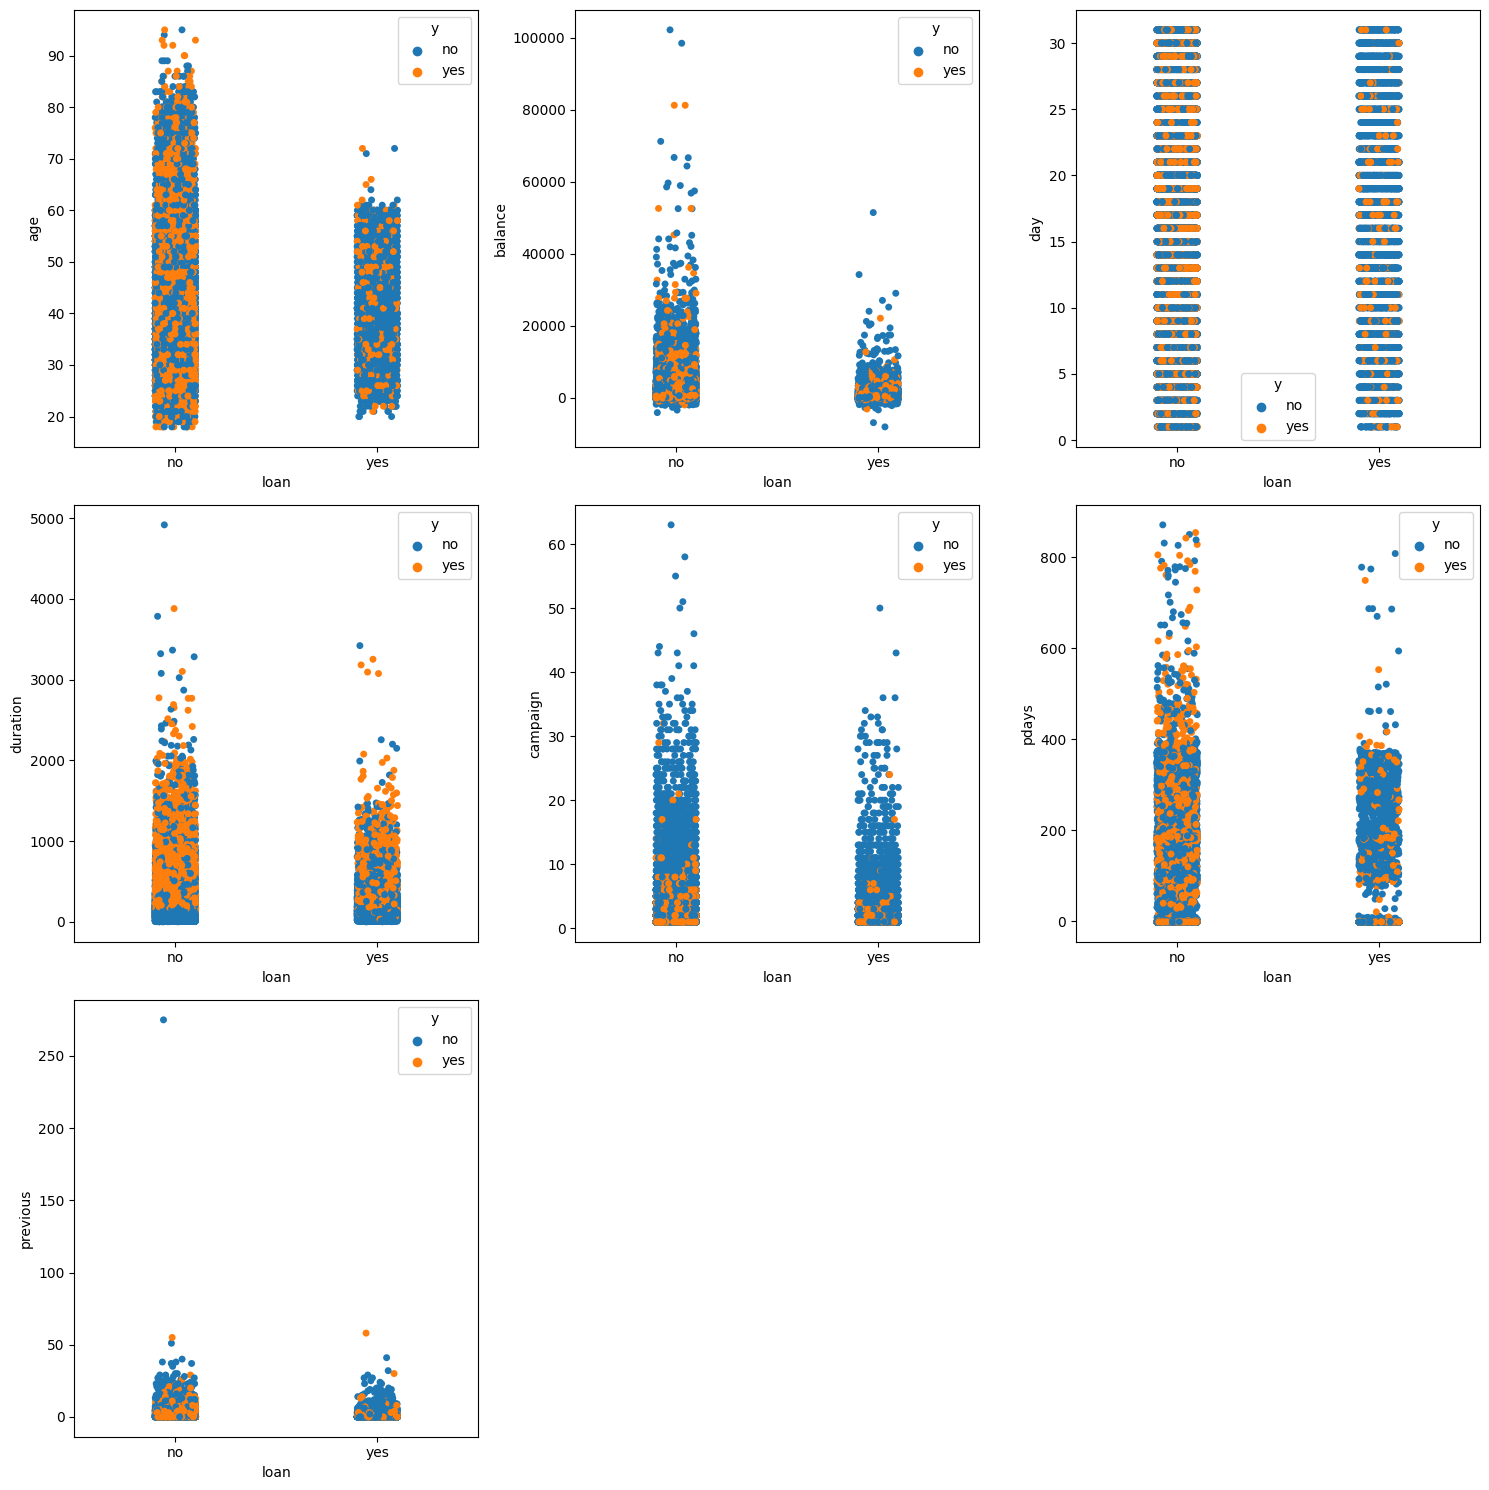

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='loan', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

- age dan loan : rata rata umur yang memiliki loan yakni rentang umur 25-55 tahun
- balance dan loan : orang yang memiliki persobal loan, cendurung memiliki yearly balance yang rendah
- duration dan loan : orang yang tidak memiliki personal loan, durasi teleponnya lebih lama (lebih tertarik maybe)
- campaign dan loan : lebih banyak menghubungi orang yang tidak memiliki personal loan
- pdays dan loan : orang yang tidak memiliki personal loan banyak yang belum dihubungi kembali setelah melakukan campaign

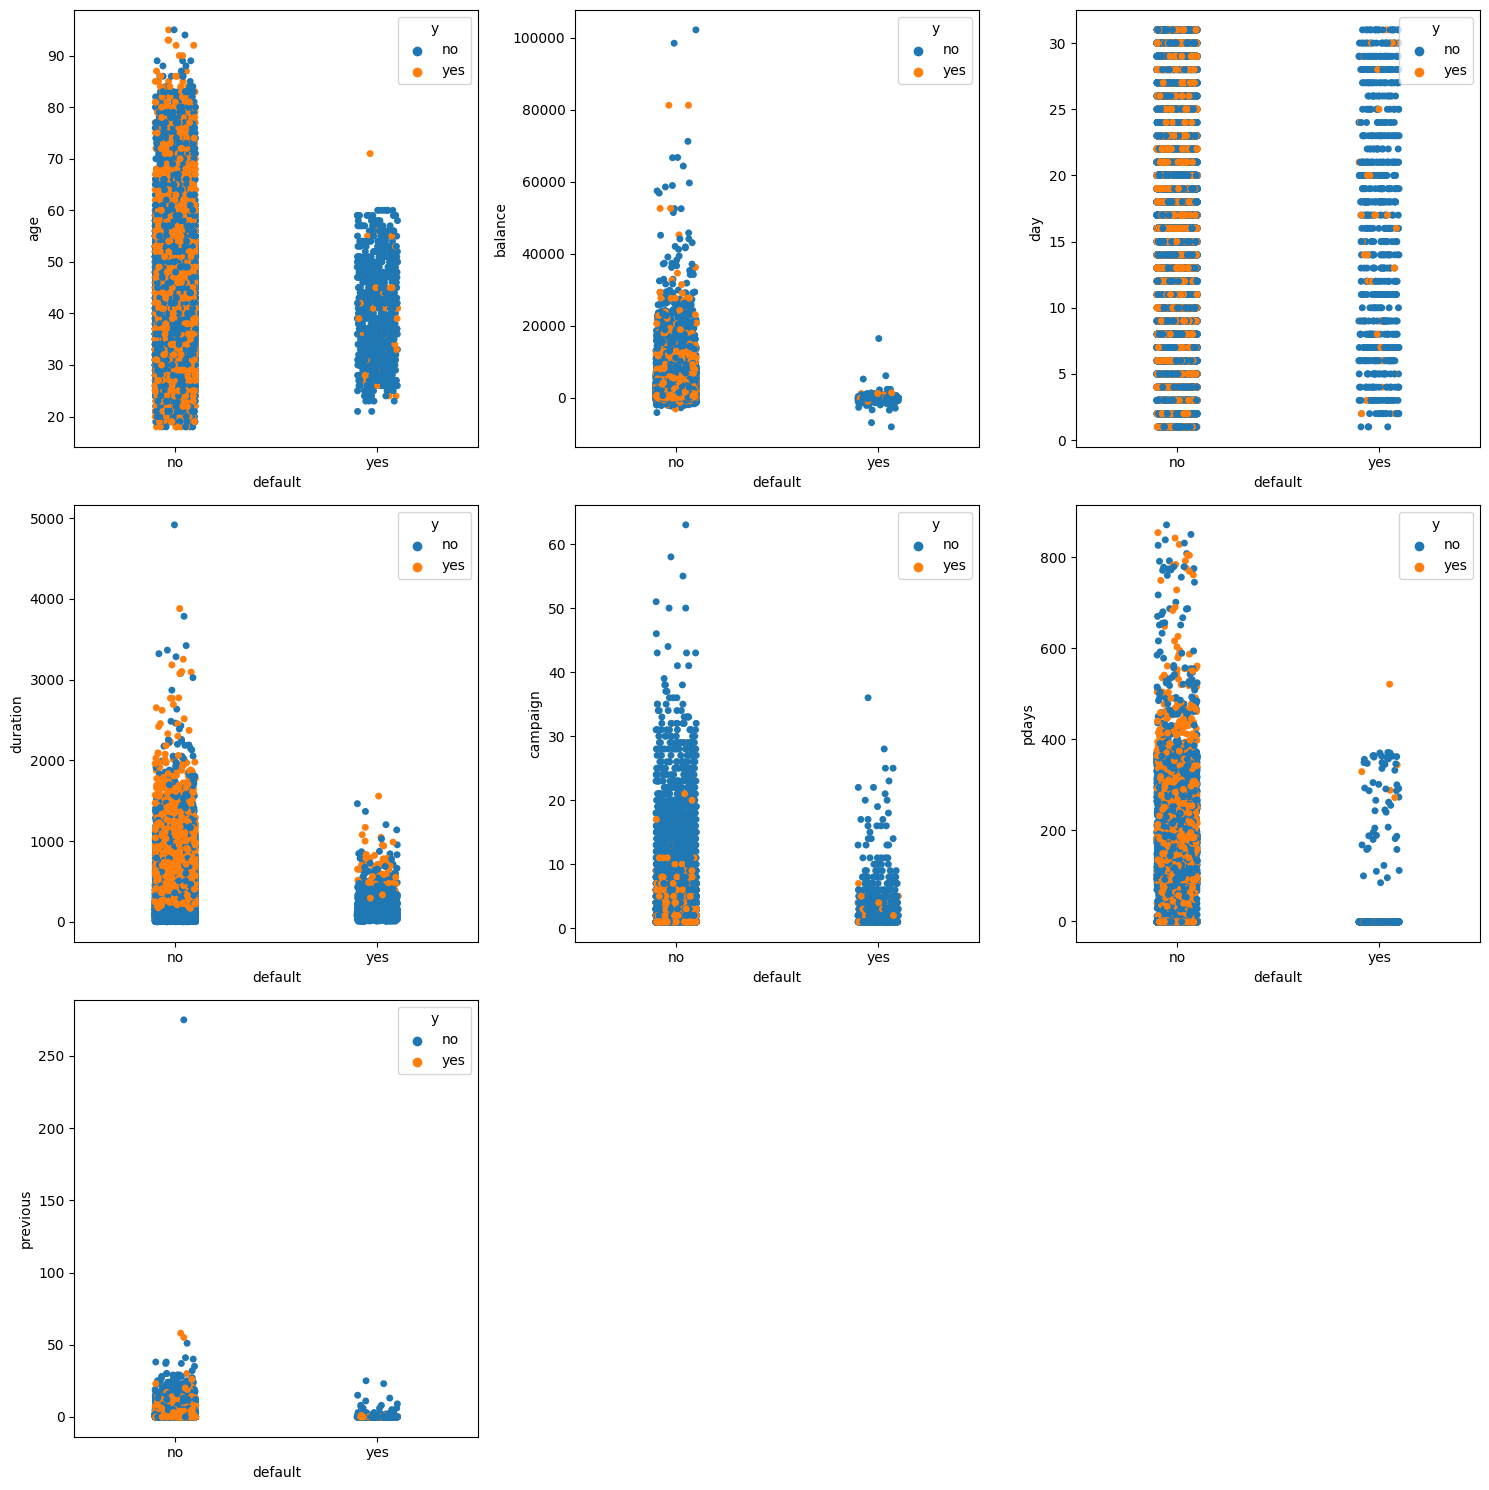

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='default', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

default = kredit macet (?)

- age dan default : umur orang tidak memiliki kredit macet berkisar antara umur 20 hingga yang tertua di umur lebih dari 90 tahun. sedangkan orang yang memiliki kredit macet berada di kisaran umur produktif yakni berumur 20 tahun - 55 tahun
- balance dan default : rata rata orang yang memiliki yearly balance yang tinggi, tidak memiliki kredit macet. begitupun sebaliknya
- duration dan default : orang yang tidak memiliki kredit yabg macet cenderung memiliki durasi telepon yang lebih lama dibandingkan dengan yang memiliki kredit macet
- campaign dan default : campaign sudah cukup banyak dilakukan kepada kontak yang tidak memiliki kredit macet (default)
- pdays dan default : orang yang tidak memiliki kredit macet banyak yang belum dihubungi kembali setelah campaign terakhir

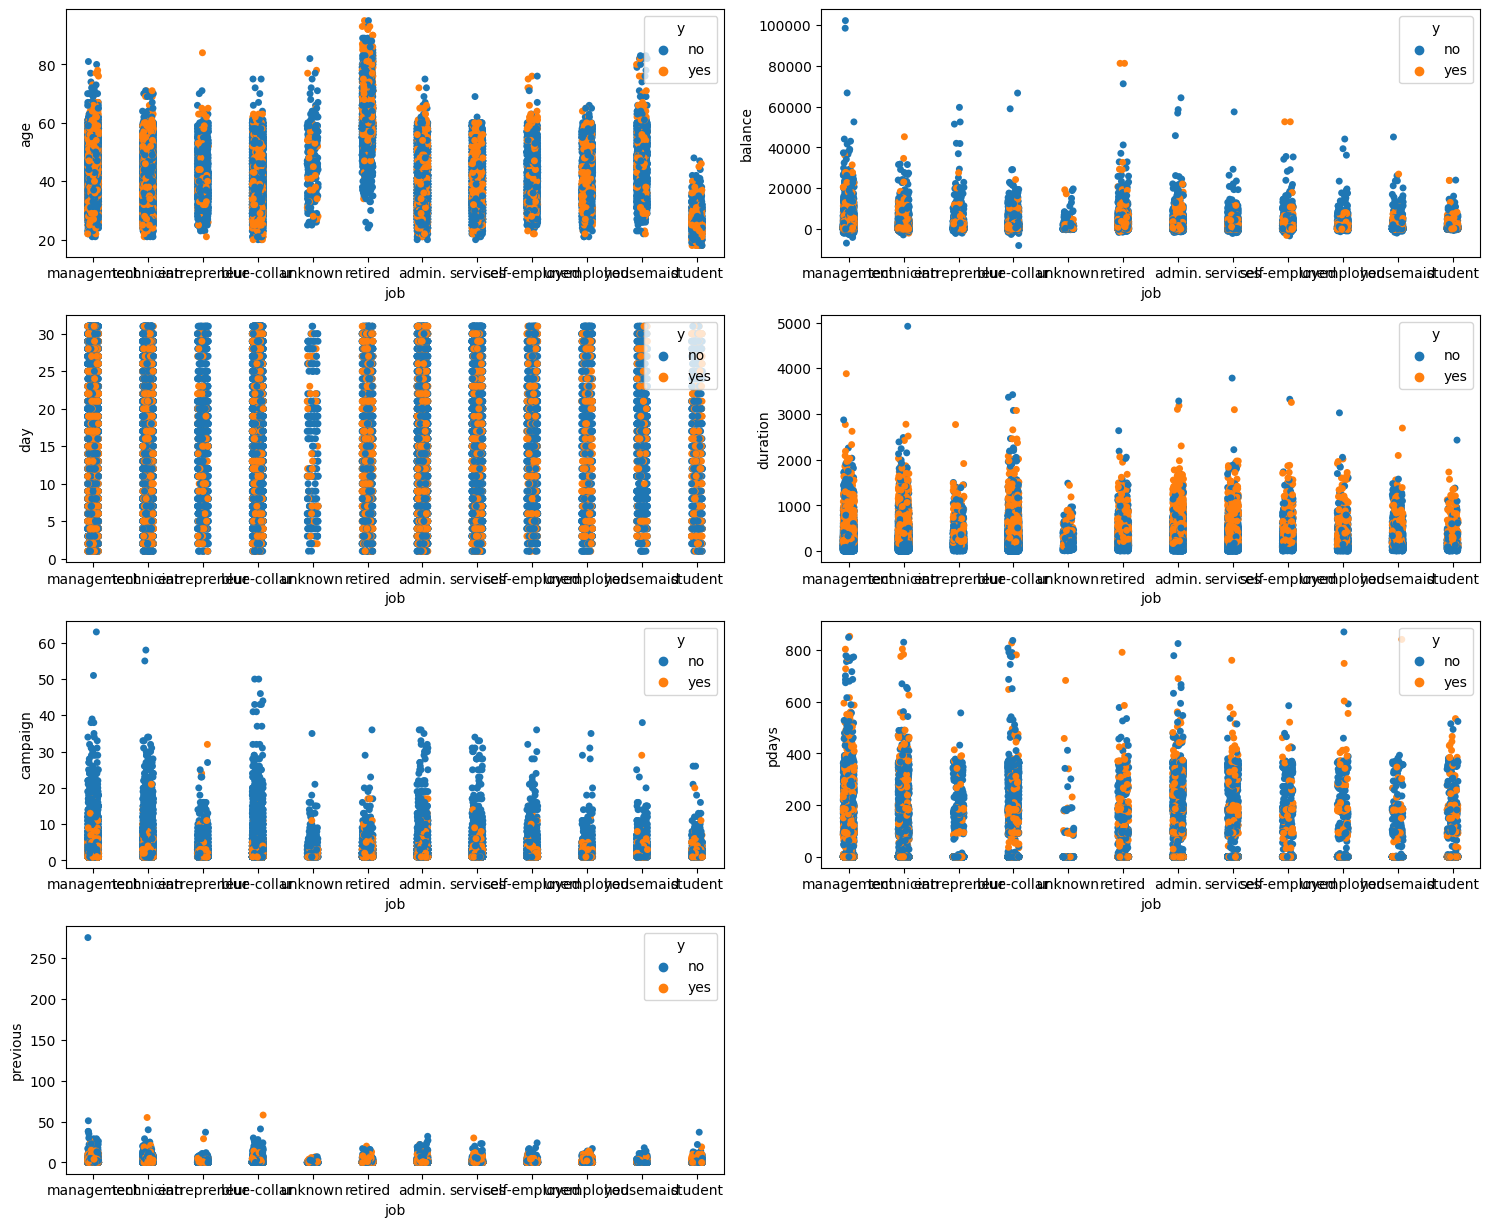

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(5, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='job', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

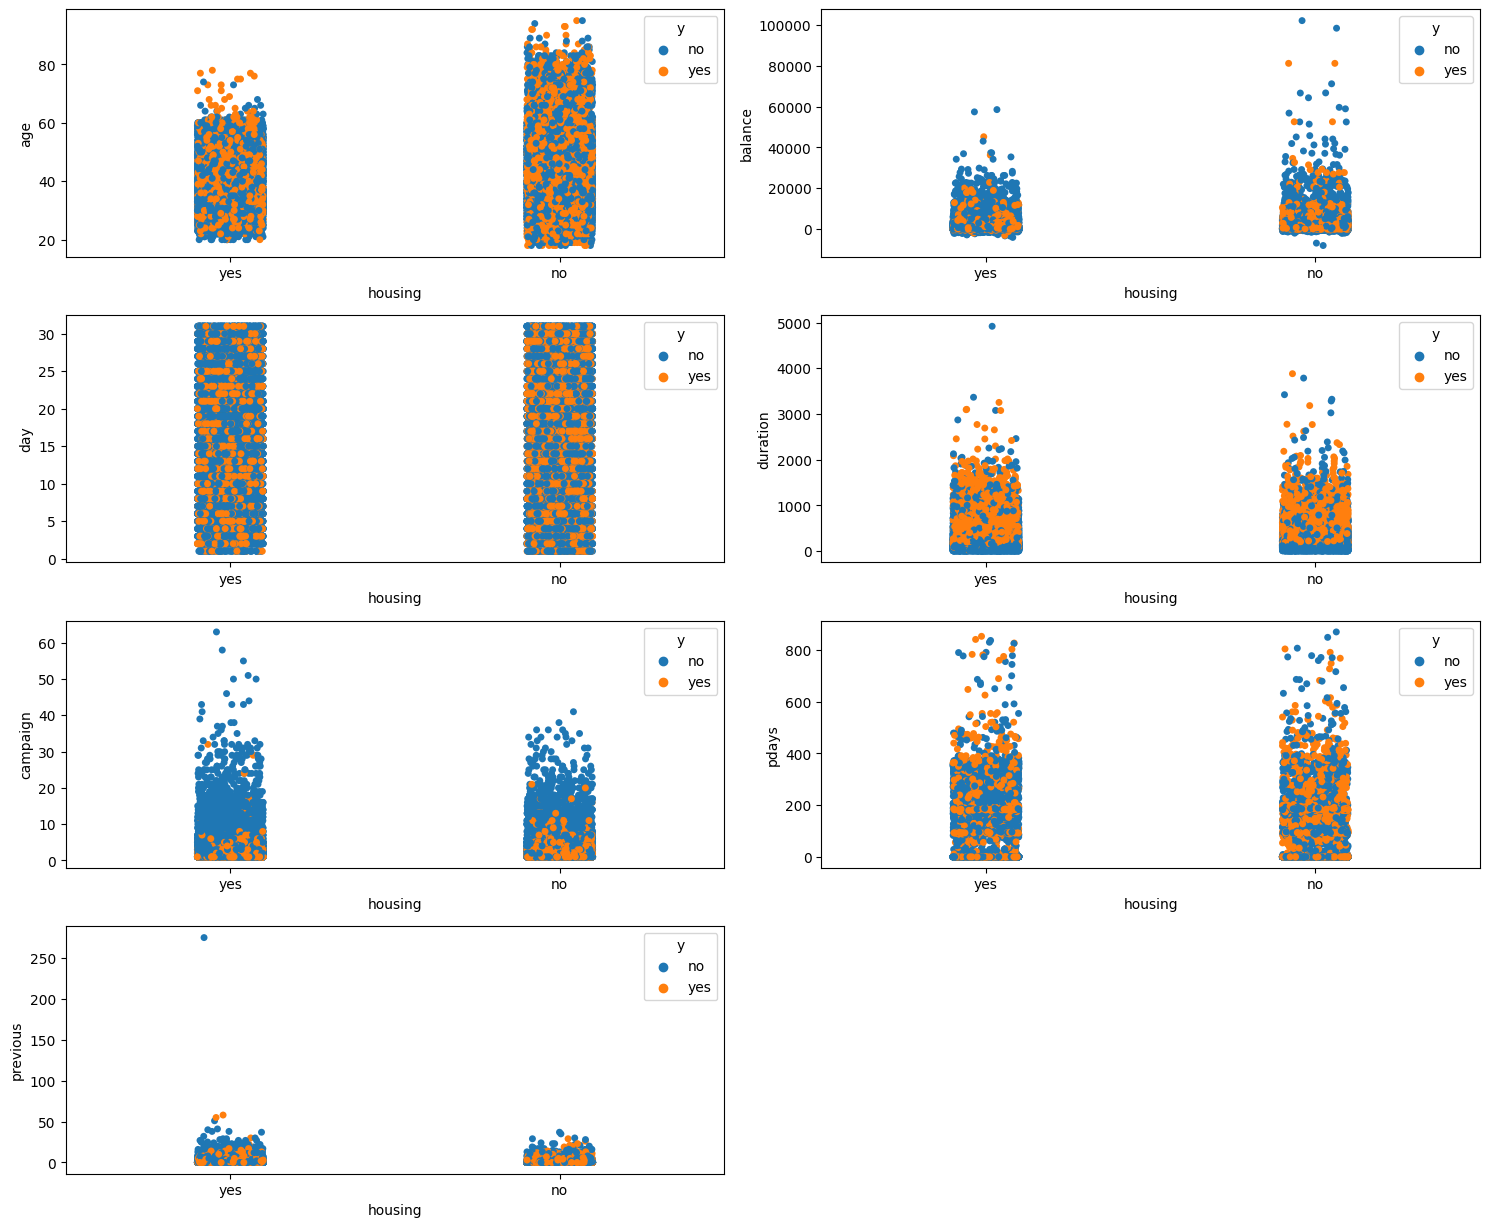

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(5, 2, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='housing', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

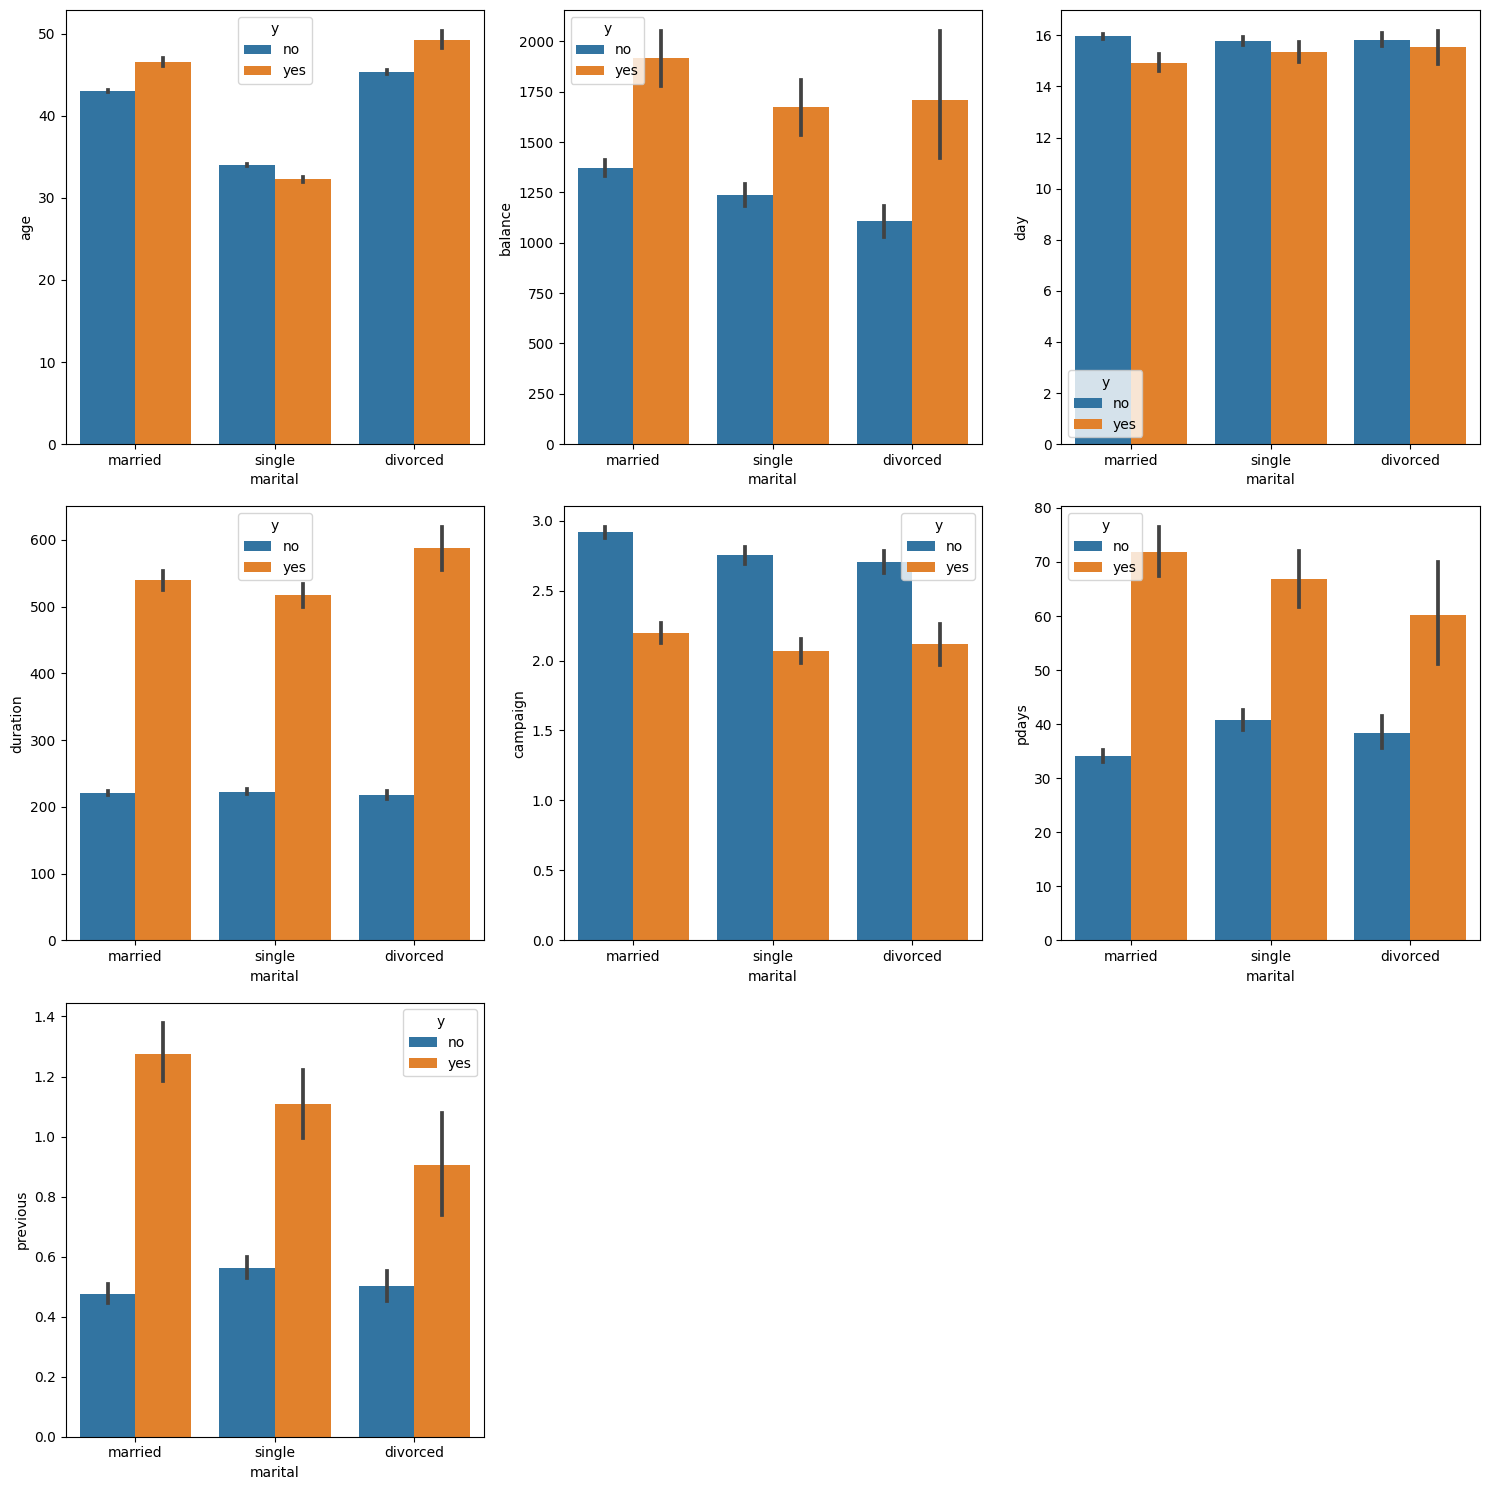

In [17]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numericals)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    plot = sns.barplot(ax=ax, data=df, x='marital', y=numericals[i], hue = 'y') # gambar catplot/stripplotnya
    plt.tight_layout()

for p in plot.patches:
   x = p.get_x() + p.get_width() / 2
   y = p.get_height()
   ax.annotate(f'Total: {p.get_height()}', (x, y+10), ha='center')

plt.show()

### kolom age dan marital denga hue y
berdasarkan kolom age dan marital dengan hue y dapat disimpulkan bahwa customer yang berstatus married dan divorced memiliki lebih banyak

### kolom age dan marital denga hue y
berdasarkan kolom age dan marital dengan hue y dapat disimpulkan bahwa customer yang berstatus married dan divorced lebih banyak yang memutuskan membeli deposito dibandingkan dengan customer yang tidak membeli deposito pada usia yang cukup tua. hal ini berkebalikan dengan customer yang memiliki status single dimana customer yang membeli deposito berada pada usia yang lebih muda

### kolom balance dan marital dengan hue y

berdasarkan kolom balance dan marital, customer pada setiap status marital dengan balance yang lebih tinggi memutuskan membeli deposito

### kolom duration, marital dengan hue y

berdasarkan kolom duration, marital dengan hue y, customer pada setiap status marital dengan mendapatkan durasi campaign yang lama memutuskan membeli deosito


### kolom campaign, marital dengan hue y
berdasarkan kolom campign, marital dengan hue y, pada setiap status marital customer dengan jumlah campign yang diterima lebih banyak memutuskan tidak membeli deposito

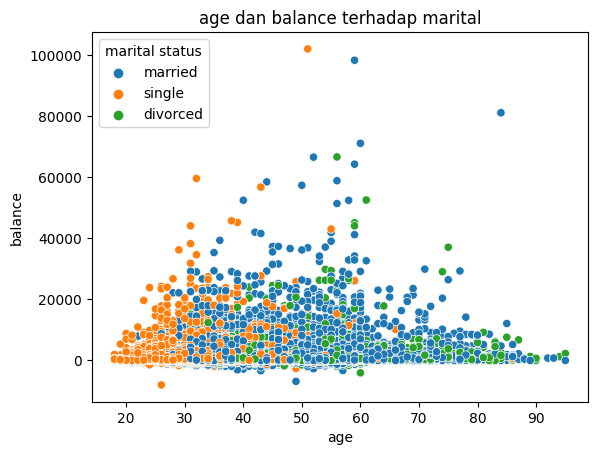

In [ ]:
sns.scatterplot(x='age', y = 'balance', data=df, hue='marital')
plt.xlabel('age')
plt.ylabel('balance')
plt.title('age dan balance terhadap marital')
plt.legend(title='marital status')
plt.show()

INFORMATION

The term lengths for time deposits in Portuguese banking institutions typically range from a few months to several years. Here are the most common term lengths:

1. Short-Term Deposits: These typically have terms of 3 months, 6 months, and 1 year. Short-term deposits offer lower interest rates compared to longer-term options.

2. Medium-Term Deposits: Terms for medium-term deposits often range from 2 years to 3 years. These may offer slightly higher interest rates than short-term deposits.

3. Long-Term Deposits: Longer-term deposits can have terms of 5 years or more. They tend to offer higher interest rates but require you to commit your funds for an extended period.

4. Custom Term Lengths: Some banks may allow you to choose custom term lengths that fall outside the standard options mentioned above. This flexibility can be helpful if you have specific financial goals in mind.

**mas ferdy**

Insight : kita dapat melihat persebaran status customer untuk yang married dan single paling banyak berada di umur < 20 - 65 tahun dengan balance sekitar 0 - 20rb

Insight :
- kita dapat memberikan campaign yang berbeda untuk setiap jenjang status, misal untuk customer di umur 15 - 30 tahun dan belum menikah bisa diberikan penawaran berupa deposito rendah biaya dengan tipe deposito medium - long term deposits
- untuk umur 30 - 55 tahun, dapat diberikan penawaran berupa deposito biaya menengah dengan tipe deposito medium - short term deposit


**mba jun**

Insight : kita dapat memberikan campaign yang berbeda untuk setiap jenjang status, misal untuk customer di umur 15 - 30 tahun dan belum menikah bisa diberikan penawaran berupa deposito yang menghasilkan bunga yang tinggi dan waktu deposito yang rendah ( <5 tahun)

Insight :
Dan untuk umur 30 - 55 tahun, dapat diberikan penawaran berupa deposito dengan bunga menengah dengan tipe deposito untuk waktu yang lama (>5 tahun)

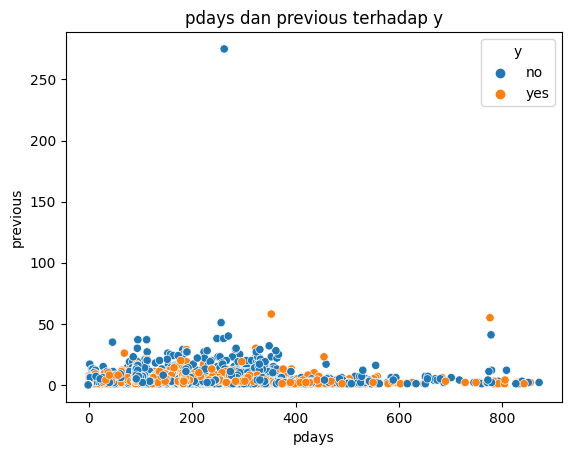

In [ ]:
sns.scatterplot(x='pdays', y = 'previous', data=df, hue='y')
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('pdays dan previous terhadap y')
plt.legend(title='y')
plt.show()

In [39]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(index=df['y'],
                                columns=[df['loan'], df['housing']])

# Lakukan uji chi-squared
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_val, dof, expected

(1157.9445807258057,
 9.765346121786838e-251,
 3,
 array([[15191.39342195, 18334.04450244,  2540.43471721,  3856.12735839],
        [ 2012.60657805,  2428.95549756,   336.56528279,   510.87264161]]))

In [40]:

print(contingency_table)

loan        no          yes      
housing     no    yes    no   yes
y                                
no       14069  19093  2658  4102
yes       3135   1670   219   265


In [41]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table3 = pd.crosstab(index=df['y'],
                                columns=[df['default']])

# Lakukan uji chi-squared
chi2_stat3, p_val3, dof3, expected3 = chi2_contingency(contingency_table3)

chi2_stat3, p_val3, dof3, expected3

(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,   719.65738426],
        [ 5193.65738426,    95.34261574]]))

hubungan y dengan default signifikan

In [42]:
contingency_table3

default     no  yes
y                  
no       39159  763
yes       5237   52

In [43]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table4 = pd.crosstab(index=df['y'],
                                columns=[df['poutcome']])
# Lakukan uji chi-squared
chi2_stat4, p_val4, dof4, expected4 = chi2_contingency(contingency_table4)
chi2_stat4, p_val4, dof4, expected4

(4391.506588768661,
 0.0,
 3,
 array([[ 4327.65747274,  1624.74795957,  1334.23596028, 32635.35860742],
        [  573.34252726,   215.25204043,   176.76403972,  4323.64139258]]))

In [44]:
contingency_table4

poutcome  failure  other  success  unknown
y                                         
no           4283   1533      533    33573
yes           618    307      978     3386

In [47]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table5 = pd.crosstab(index=df['y'],
                                columns=[df['loan']])

# Lakukan uji chi-squared
chi2_stat5, p_val5, dof5, expected5 = chi2_contingency(contingency_table5)


chi2_stat5, p_val5, dof5, expected5

(209.61698034978633,
 1.665061163492756e-47,
 1,
 array([[33525.4379244,  6396.5620756],
        [ 4441.5620756,   847.4379244]]))

In [48]:
contingency_table5

loan     no   yes
y                
no    33162  6760
yes    4805   484

In [49]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table6 = pd.crosstab(index=df['y'],
                                columns=[df['housing']])

# Lakukan uji chi-squared
chi2_stat6, p_val6, dof6, expected6 = chi2_contingency(contingency_table6)
chi2_stat6, p_val6, dof6, expected6

(874.822448867983,
 2.918797605076633e-192,
 1,
 array([[17731.82813917, 22190.17186083],
        [ 2349.17186083,  2939.82813917]]))

In [50]:
contingency_table6

housing     no    yes
y                    
no       16727  23195
yes       3354   1935

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table7 = pd.crosstab(index=df['y'],
                                columns=[df['contact']])

# Lakukan uji chi-squared
chi2_stat7, p_val7, dof7, expected7 = chi2_contingency(contingency_table7)
chi2_stat7, p_val7, dof7, expected7

(1035.7142253562922,
 1.251738325340495e-225,
 2,
 array([[25859.09999779,  2566.04215788, 11496.85784433],
        [ 3425.90000221,   339.95784212,  1523.14215567]]))

In [52]:
contingency_table7

contact  cellular  telephone  unknown
y                                    
no          24916       2516    12490
yes          4369        390      530

In [53]:
import pandas as pd
from scipy.stats import chi2_contingency


# Membuat tabel kontingensi
contingency_table8 = pd.crosstab(index=df['y'],
                                columns=[df['marital']])

# Lakukan uji chi-squared
chi2_stat8, p_val8, dof8, expected8 = chi2_contingency(contingency_table8)
chi2_stat8, p_val8, dof8, expected8

(196.4959456560396,
 2.1450999986791486e-43,
 2,
 array([[ 4597.86012254, 24030.37552808, 11293.76434938],
        [  609.13987746,  3183.62447192,  1496.23565062]]))

In [54]:
contingency_table8

marital  divorced  married  single
y                                 
no           4585    24459   10878
yes           622     2755    1912

In [55]:
# Membuat tabel kontingensi
contingency_table9 = pd.crosstab(index=df['y'],
                                columns=[df['education']])

# Lakukan uji chi-squared
chi2_stat9, p_val9, dof9, expected9 = chi2_contingency(contingency_table9)
chi2_stat9, p_val9, dof9, expected9


(238.92350616407606,
 1.6266562124072994e-51,
 3,
 array([[ 6049.5371038 , 20487.71856407, 11744.98511424,  1639.75921789],
        [  801.4628962 ,  2714.28143593,  1556.01488576,   217.24078211]]))

In [56]:
contingency_table9

education  primary  secondary  tertiary  unknown
y                                               
no            6260      20752     11305     1605
yes            591       2450      1996      252

In [57]:
# Membuat tabel kontingensi
contingency_table10 = pd.crosstab(index=df['y'],
                                columns=[df['job']])

# Lakukan uji chi-squared
chi2_stat10, p_val10, dof10, expected10 = chi2_contingency(contingency_table10)
chi2_stat10, p_val10, dof10, expected10

(836.1054877471965,
 3.337121944935502e-172,
 11,
 array([[4566.0715755 , 8593.5038818 , 1313.04359559, 1094.93884232,
         8351.55771825, 1999.14640242, 1394.28099356, 3668.04512176,
          828.2682533 , 6708.26643958, 1150.56879963,  254.30837628],
        [ 604.9284245 , 1138.4961182 ,  173.95640441,  145.06115768,
         1106.44228175,  264.85359758,  184.71900644,  485.95487824,
          109.7317467 ,  888.73356042,  152.43120037,   33.69162372]]))

In [58]:
contingency_table10

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     4540         9024          1364       1131        8157     1748   
yes     631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1392      3785      669        6757        1101      254  
yes            187       369      269         840         202       34

In [59]:
# Membuat tabel kontingensi
contingency_table11 = pd.crosstab(index=df['y'],
                                columns=[df['month']])

# Lakukan uji chi-squared
chi2_stat11, p_val11, dof11, expected11 = chi2_contingency(contingency_table11)
chi2_stat11, p_val11, dof11, expected11

(3061.8389384452685,
 0.0,
 11,
 array([[ 2589.00055296,  5516.19592577,   188.96525182,  2339.10725266,
          1238.87031917,  6088.3897724 ,  4716.18415872,   421.19824821,
         12155.58718011,  3505.57032581,   651.66521422,   511.26579815],
        [  342.99944704,   730.80407423,    25.03474818,   309.89274734,
           164.12968083,   806.6102276 ,   624.81584128,    55.80175179,
          1610.41281989,   464.42967419,    86.33478578,    67.73420185]]))

In [60]:
contingency_table11

month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
y                                                                         
no     2355  5559  114  2208  1261  6268  4795  229  12841  3567  415  310
yes     577   688  100   441   142   627   546  248    925   403  323  269

Jika dilihat dari perbandinga C-Square untuk semua data dengan tipe categoric - categoric, menunjukan bahwa semua variable saling berkesinambungan, maka tidak ada variable yang di buang pada tahap ini

Selanjutnya terdapat variabel yang akan kita buang dikarenakan tidak berpengaruh terhadap data diantaranya adalah : \
- Day\
- Age\
- Duration